In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import datetime
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def loader_data(directed, refinement = False):
    
    # check the directed value
    if directed: lab = ''
    else: lab = '_und'
        
    if refinement: ref = '_refinement'
    else: ref = ''
        
    # STATS
    # reading from keys
    with open("results/keys_stats{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    stats = {}
    # reading dataframes
    for key in keys:
        stats[key] = pd.read_csv("results/stats{}_{}{}.csv".format(lab, str(key), ref))
        
    # DATA
    # reading from keys
    with open("results/keys_data{}{}.txt".format(lab, ref), "r") as f:
        keys = eval(f.read())

    data = {}
    # reading dataframes
    for key in keys:
        data[key] = [pd.read_csv("results/data{}_{}_metrics{}.csv".format(lab, str(key), ref)),
                     pd.read_csv("results/data{}_{}_levels{}.csv".format(lab, str(key), ref))]

    return stats, data

In [3]:
stats_dir, data_dir = loader_data(True)
stats_und, data_und = loader_data(False)
stats_dir_ref, data_dir_ref = loader_data(True, True)
stats_und_ref, data_und_ref = loader_data(False, True)

## Results

The graph will be disconnected for values < log(n)/n (sharp phase transition for P: G is connected)

For n = 10^3, this threshold is approximately 0.007

In [4]:
def plot_data(directed, data, refinement = False):
    
    if directed: 
        lab = 'directed'
    else : lab = 'undirected'  
        
    if refinement: 
        ref = '_ref'
    else : ref = ''
    
    fig, axs = plt.subplots(7,2,figsize = (20,40))
    
    for i, k in enumerate(data.keys()):
        axs[i,0].set_title('Metrics with p = {}'.format(k))
        data[k][0].boxplot(ax=axs[i,0])
        axs[i,1].set_title('Levels with p = {}'.format(k))
        data[k][1].boxplot(ax=axs[i,1])    

    plt.savefig('images/box_{}{}.jpeg'.format(lab, ref))
    
    return

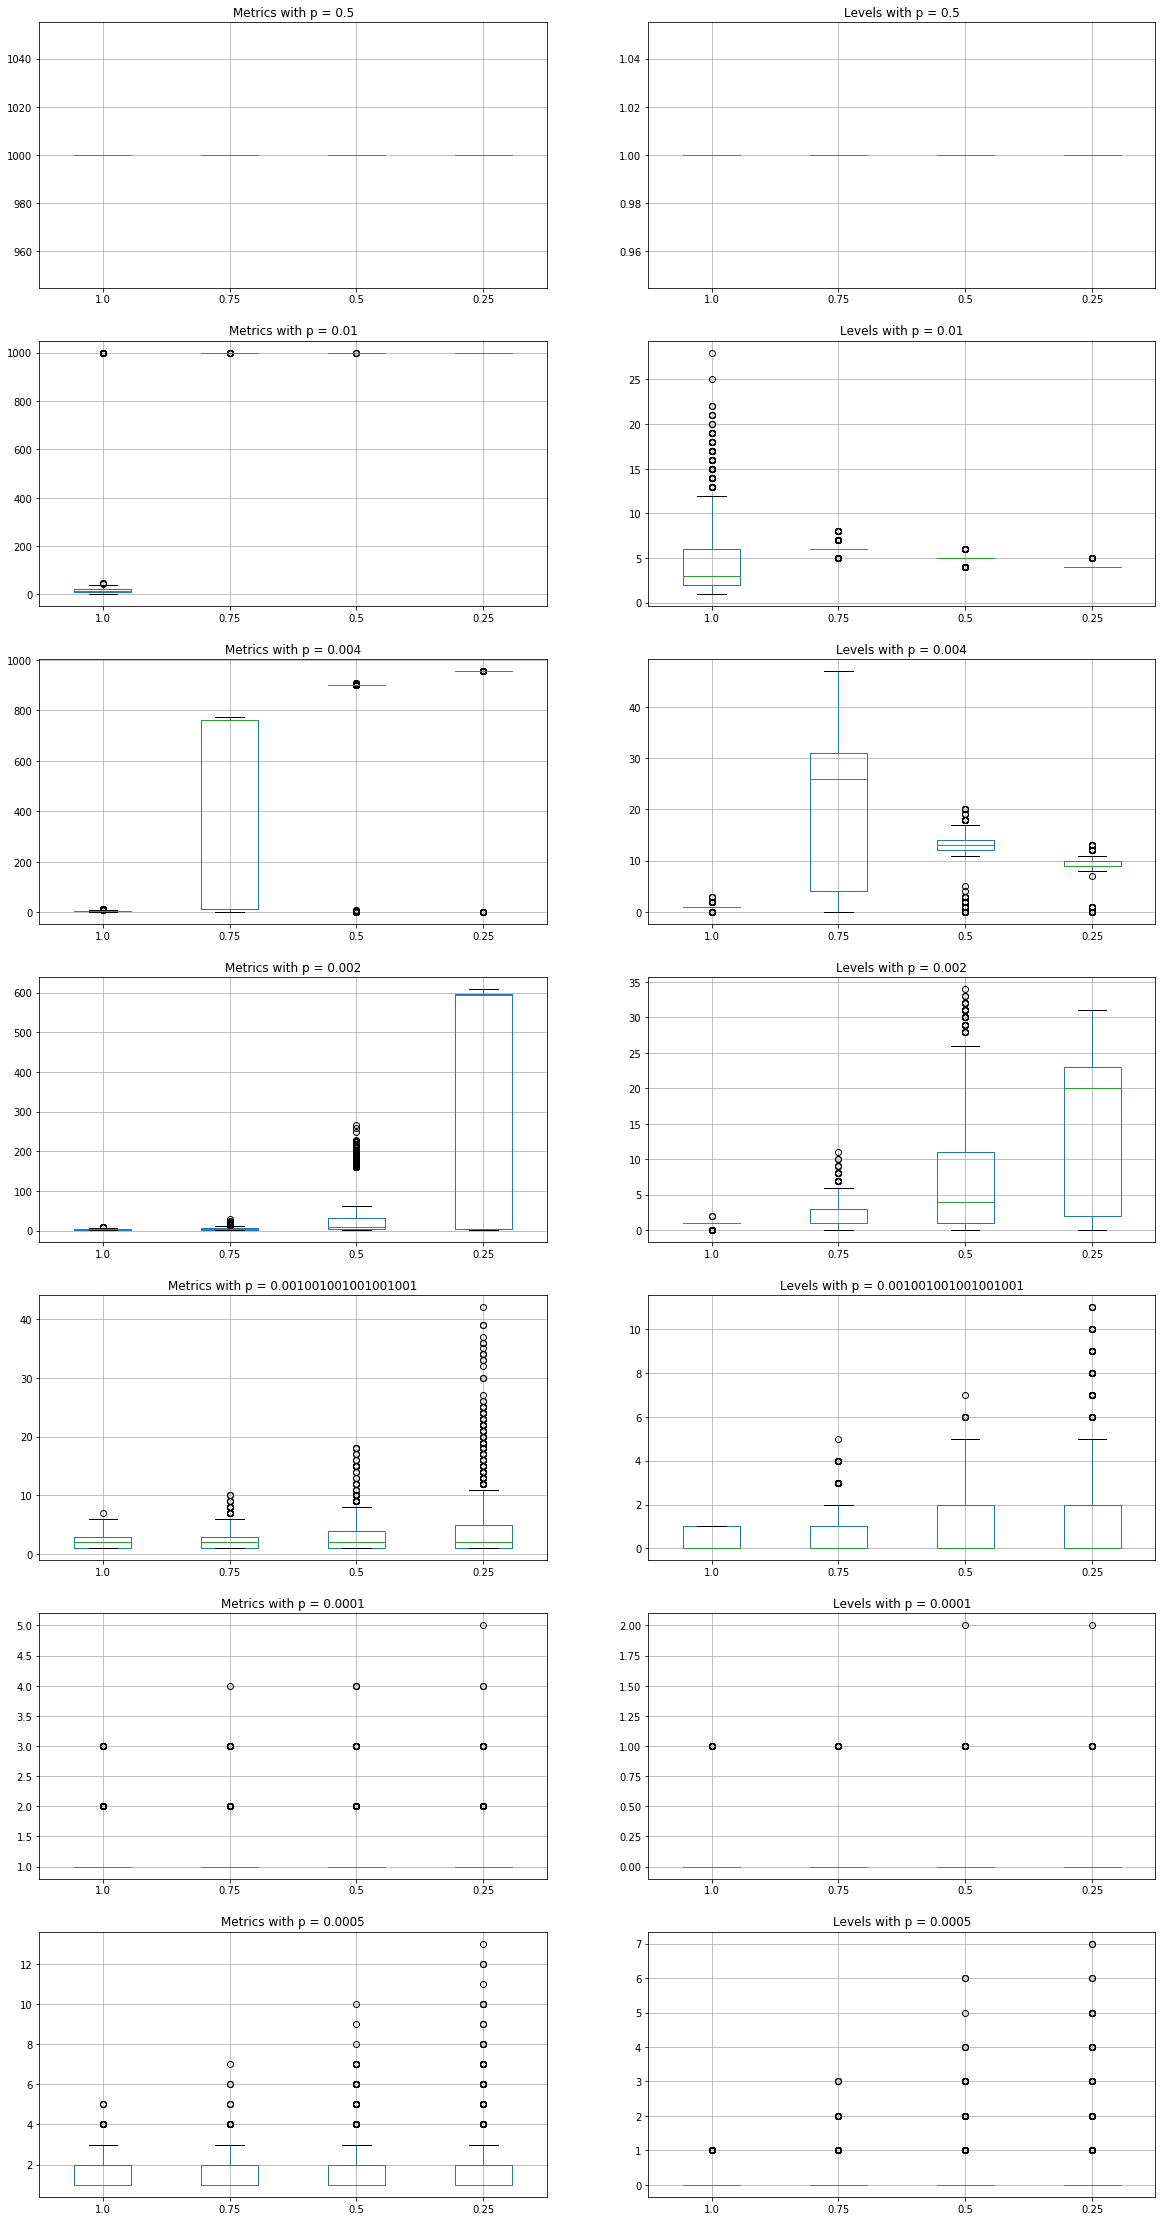

In [5]:
plot_data(True, data_dir)

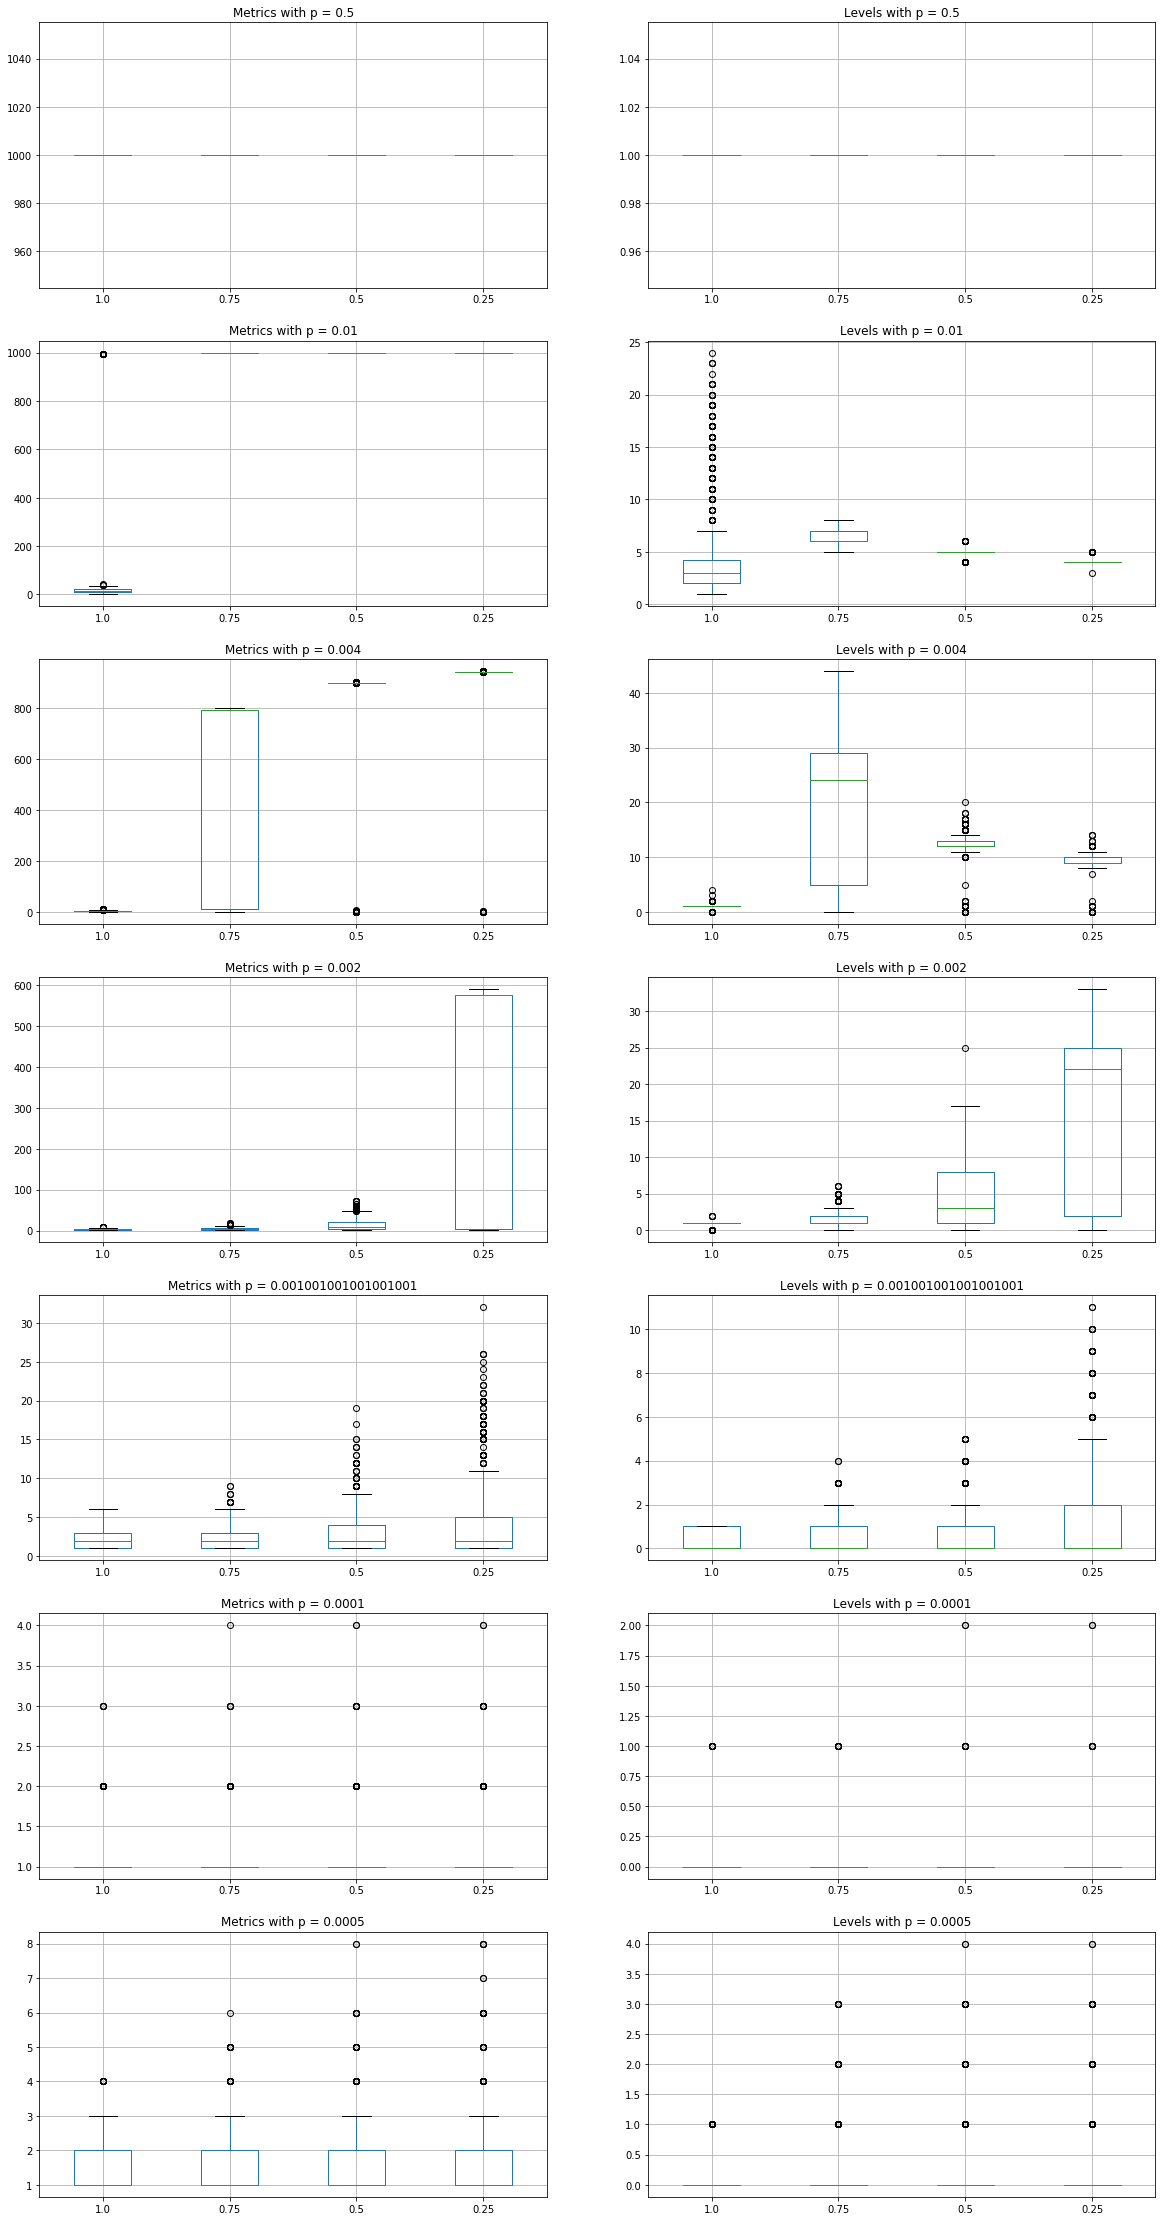

In [6]:
plot_data(False, data_und)

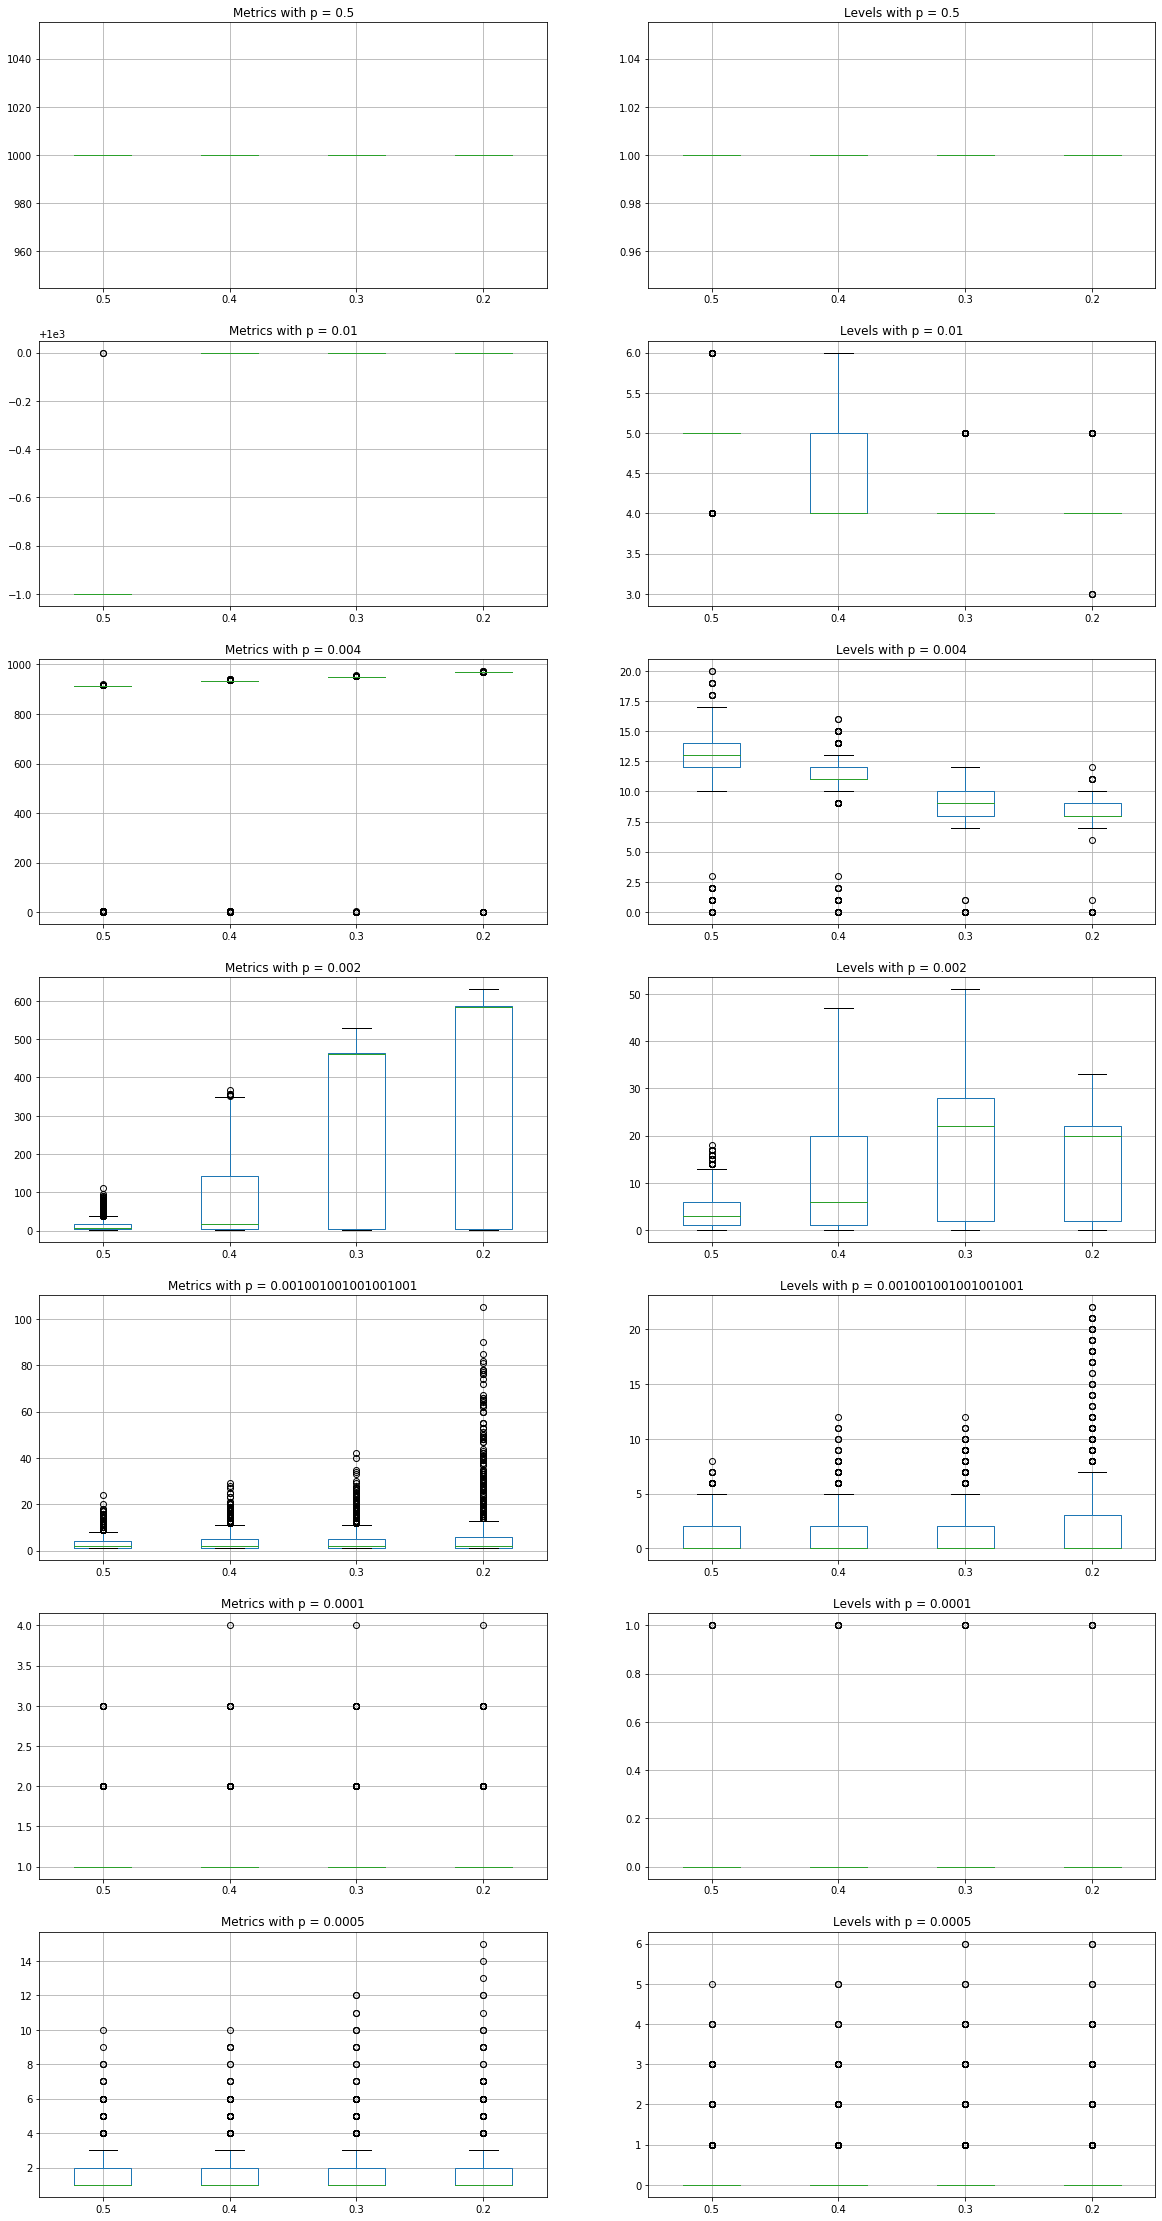

In [7]:
plot_data(True, data_dir_ref, True)

In [ ]:
plot_data(False, data_und_ref, True)

In [ ]:
print("### DIRECTED ###", end = "\n\n")
for k in stats_dir.keys():
    print("Gnp with p = ", k)
    print(stats_dir[k], end = "\n\n")

In [ ]:
print("### UNDIRECTED ###", end = "\n\n")

for k in stats_und.keys():
    print("Gnp with p = ", k)
    print(stats_und[k], end = "\n\n")

In [ ]:
print("### REFINEMENT DIRECTED ###", end = "\n\n")
for k in stats_dir_ref.keys():
    print("Gnp with p = ", k)
    print(stats_dir_ref[k], end = "\n\n")

In [ ]:
print("### REFINEMENT UNDIRECTED ###", end = "\n\n")
for k in stats_und_ref.keys():
    print("Gnp with p = ", k)
    print(stats_und_ref[k], end = "\n\n")